In [1]:
import cv2
import numpy as np
from os.path import join
import os
import matplotlib.pyplot as plt

# placeholder path

dir_RK = r"C:\Users\roma0\cvpr_group\lab_2\images\RK_dataset\test"
dir_AS = r"C:\Users\roma0\cvpr_group\lab_2\images\AS_dataset\test"
dir_RB = r"C:\Users\roma0\cvpr_group\lab_2\images\RB_dataset\test"

dir_test_p = dir_RK
dir_test_n1 = dir_RB
dir_test_n2 = dir_AS
dir_train = r"C:\Users\roma0\cvpr_group\lab_2\images\RK_dataset\test_test"
detect = cv2.AKAZE_create(descriptor_type = 2)
extract = cv2.AKAZE_create(descriptor_type = 2)
#detect = cv2.xfeatures2d.SURF_create()
#extract = cv2.xfeatures2d.SURF_create()
flann_params = dict(algorithm = 1, trees = 5)
matcher = cv2.FlannBasedMatcher(flann_params, {})

bow_kmeans_trainer = cv2.BOWKMeansTrainer(40)
extract_bow = cv2.BOWImgDescriptorExtractor(extract, matcher)

def extract_sift(fn):
  im = cv2.imread(fn,0)
  im = cv2.resize(im, (im.shape[0]//3, im.shape[1]//3), interpolation = cv2.INTER_AREA)
  return extract.compute(im, detect.detect(im))[1]
  
k = 0    
for filename in os.listdir(dir_test_p):
  k=k+1
  print("1:" + str(k))
  bow_kmeans_trainer.add(extract_sift(os.path.join(dir_test_p, filename)))
  if k == 20:
    break
k = 0    
for filename in os.listdir(dir_test_n1):                 
  k=k+1
  print("2:" + str(k))
  bow_kmeans_trainer.add(extract_sift(os.path.join(dir_test_n1, filename)))
  if k == 10:
    break
k = 0    
for filename in os.listdir(dir_test_n2):                 
  k=k+1
  print("3:" + str(k))
  bow_kmeans_trainer.add(extract_sift(os.path.join(dir_test_n2, filename)))
  if k == 10:
    break    
voc = bow_kmeans_trainer.cluster()
extract_bow.setVocabulary( voc )

def bow_features(fn):
  im = cv2.imread(fn,0)
  im = cv2.resize(im, (im.shape[0]//3, im.shape[1]//3), interpolation = cv2.INTER_AREA)
  return extract_bow.compute(im, detect.detect(im))

traindata, trainlabels = [],[]
k = 0
for filename in os.listdir(dir_test_p):
  k = k+1
  print("1:" + str(k))
  traindata.extend(bow_features(os.path.join(dir_test_p, filename))); trainlabels.append(1)
  if k == 30:
    break
k = 0
for filename in os.listdir(dir_test_n1):
  k = k+1
  print("2:" + str(k))
  traindata.extend(bow_features(os.path.join(dir_test_n1, filename))); trainlabels.append(-1)    
  if k == 15:
    break
k = 0    
for filename in os.listdir(dir_test_n2):
  k = k+1
  print("3:" + str(k))
  traindata.extend(bow_features(os.path.join(dir_test_n2, filename))); trainlabels.append(-1)    
  if k == 15: 
    break
svm = cv2.ml.SVM_create()
svm.train(np.array(traindata), cv2.ml.ROW_SAMPLE, np.array(trainlabels))

def predict(fn):
  f = bow_features(fn);  
  p = svm.predict(f)
  return p
font = cv2.FONT_HERSHEY_SIMPLEX
# again placeholder paths



1:1
1:2
1:3
1:4
1:5
1:6
1:7
1:8
1:9
1:10
1:11
1:12
1:13
1:14
1:15
1:16
1:17
1:18
1:19
1:20
2:1
2:2
2:3
2:4
2:5
2:6
2:7
2:8
2:9
2:10
3:1
3:2
3:3
3:4
3:5
3:6
3:7
3:8
3:9
3:10
1:1
1:2
1:3
1:4
1:5
1:6
1:7
1:8
1:9
1:10
1:11
1:12
1:13
1:14
1:15
1:16
1:17
1:18
1:19
1:20
1:21
1:22
1:23
1:24
1:25
1:26
1:27
1:28
1:29
1:30
2:1
2:2
2:3
2:4
2:5
2:6
2:7
2:8
2:9
2:10
2:11
2:12
2:13
2:14
2:15
3:1
3:2
3:3
3:4
3:5
3:6
3:7
3:8
3:9
3:10
3:11
3:12
3:13
3:14
3:15


-1.0


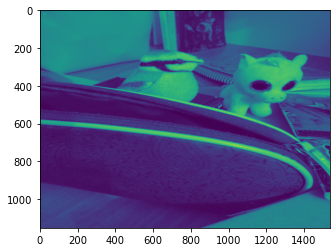

1.0


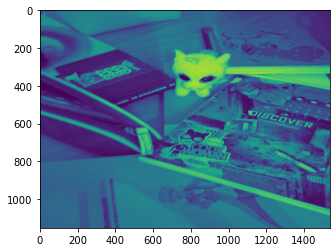

1.0


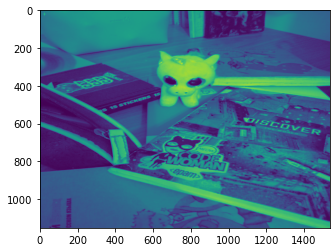

1.0


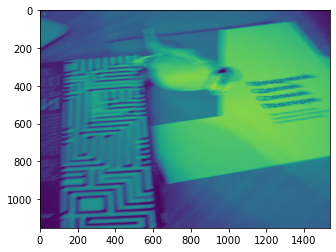

1.0


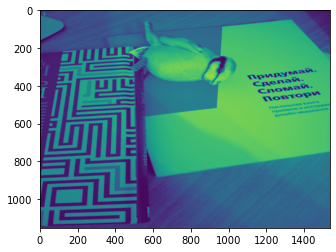

1.0


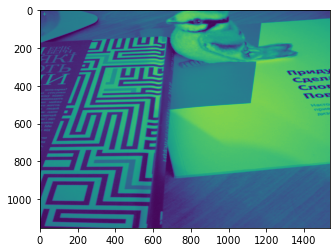

-1.0


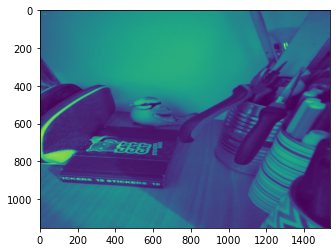

1.0


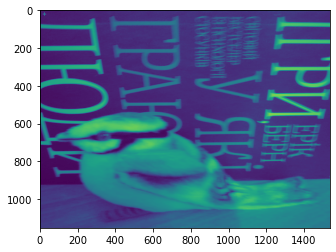

1.0


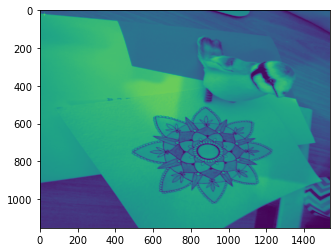

-1.0


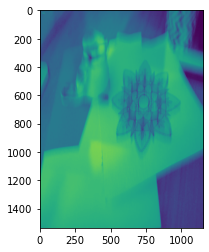

1.0


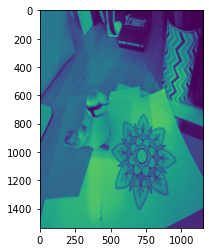

1.0


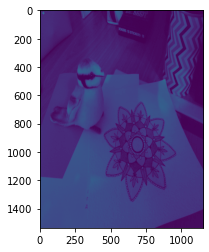

1.0


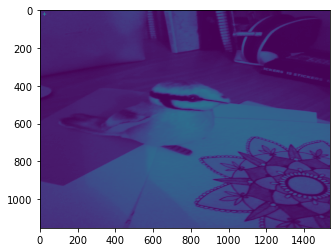

-1.0


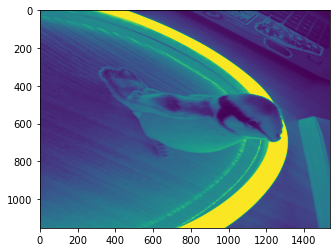

-1.0


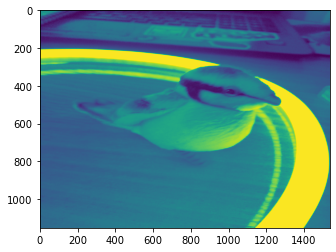

-1.0


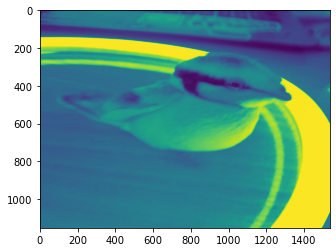

-1.0


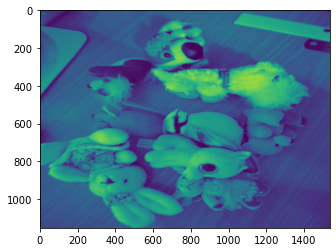

-1.0


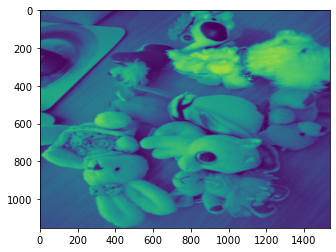

1.0


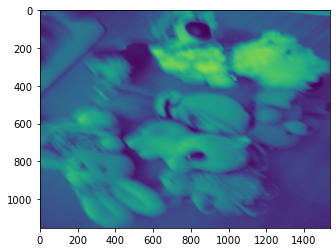

-1.0


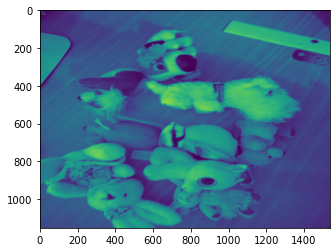

1.0


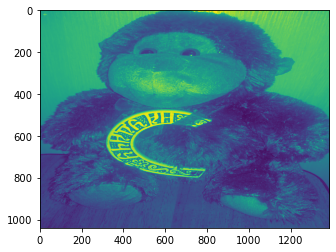

1.0


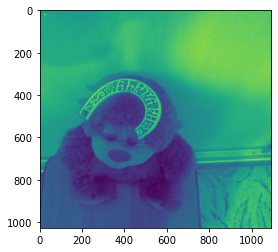

1.0


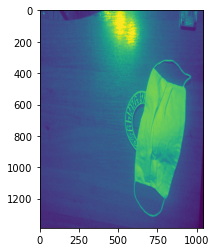

1.0


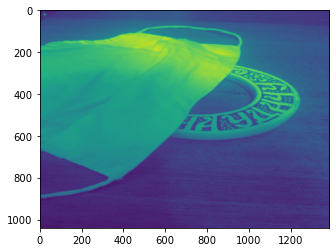

1.0


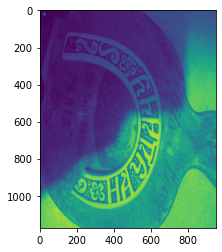

1.0


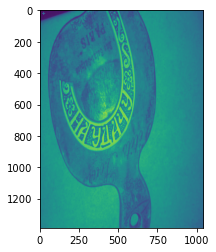

1.0


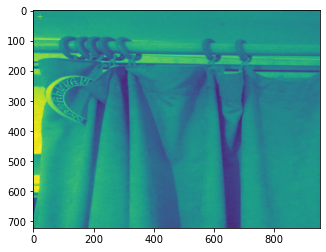

1.0


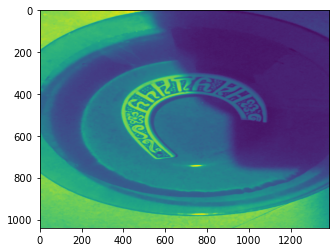

1.0


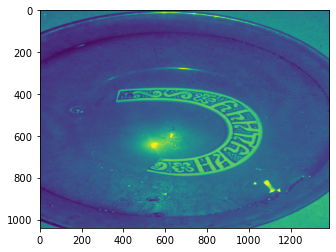

-1.0


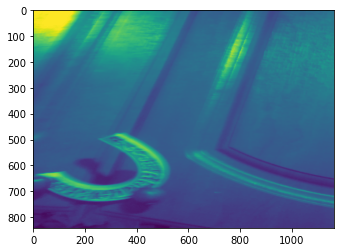

-1.0


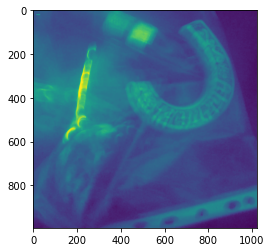

1.0


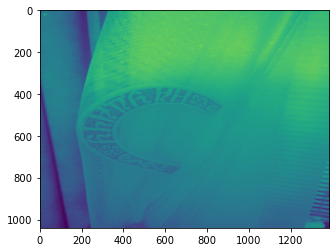

-1.0


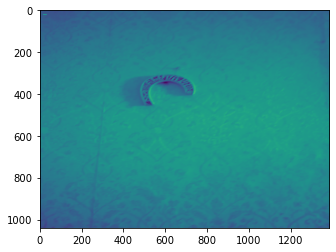

1.0


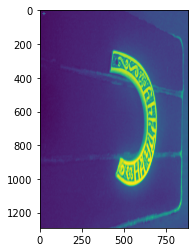

1.0


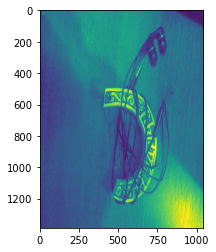

1.0


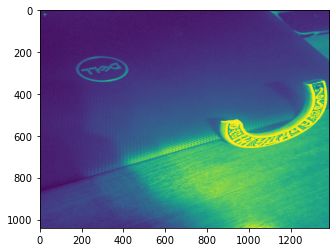

1.0


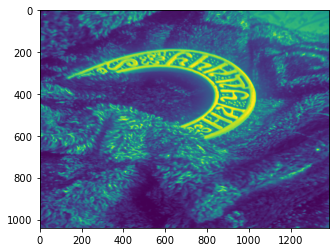

1.0


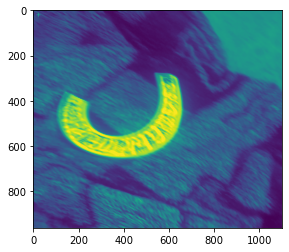

1.0


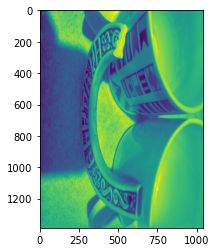

1.0


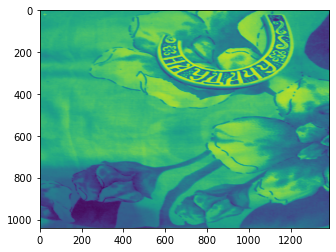

-1.0


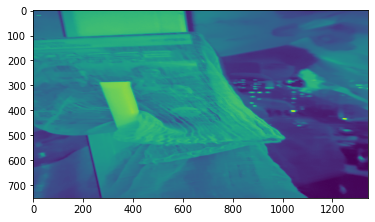

-1.0


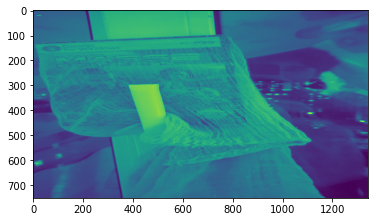

-1.0


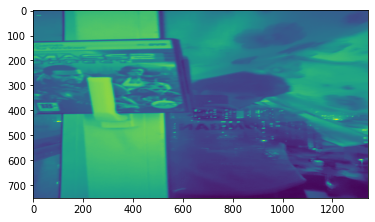

-1.0


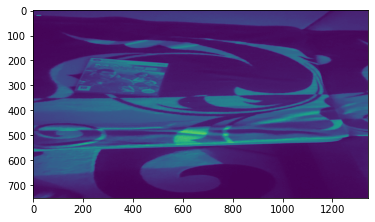

1.0


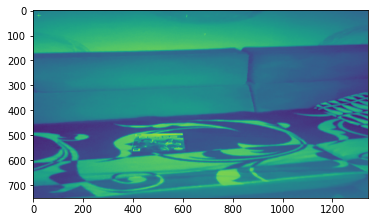

-1.0


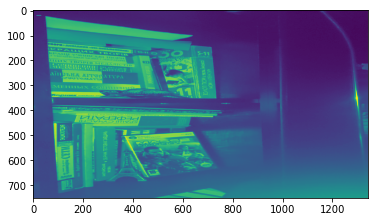

-1.0


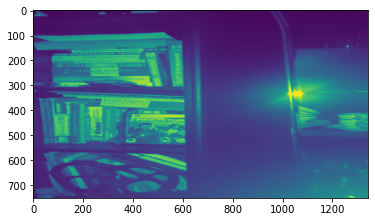

1.0


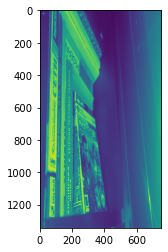

1.0


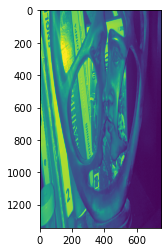

1.0


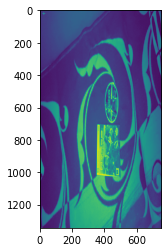

-1.0


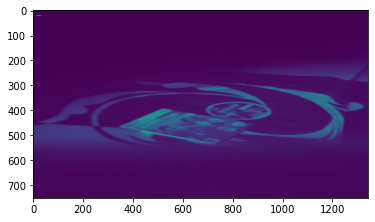

1.0


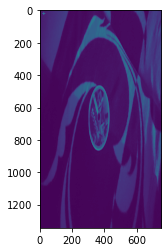

-1.0


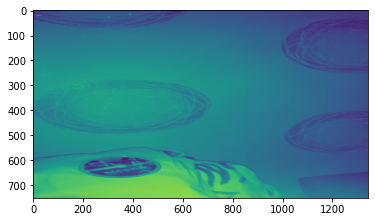

1.0


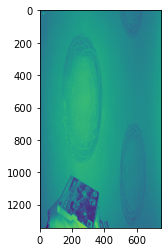

1.0


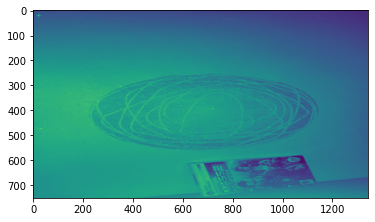

-1.0


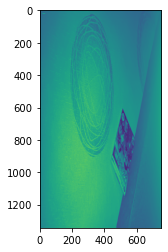

1.0


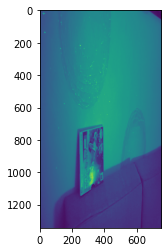

1.0


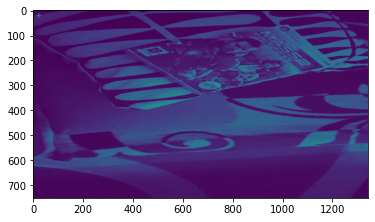

-1.0


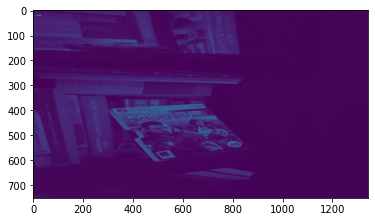

-1.0


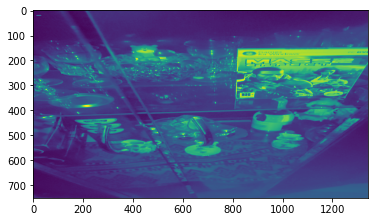

In [2]:
import datetime
import pandas as pd
metric = [[],[],[],[]]
metric[1] = [0]*60
metric[2] = [0]*60
k = 0
#first,second = 0, 0
for filename in os.listdir(dir_train):
    k = k +1
    img = cv2.imread(os.path.join(dir_train, filename), 0) 
    img = cv2.resize(img, (img.shape[0]//3, img.shape[1]//3), interpolation = cv2.INTER_AREA)
    start_time = datetime.datetime.now()
    img_predict = predict(os.path.join(dir_train, filename))
    end_time = datetime.datetime.now()
    time_diff = (end_time - start_time)
    time = time_diff.total_seconds()
    print(img_predict[1][0][0])
    metric[0].append(filename)
    metric[3].append(time)
    if (img_predict[1][0][0] == 1.0):
      cv2.putText(img,'+',(10,30), font, 1, (255,0,0),1,cv2.LINE_AA)
      if (k<20 or k > 40): 
        metric[2][k] = 1
    else:
      cv2.putText(img,'-',(10,30), font, 1, (255,0,0),1,cv2.LINE_AA)
      if (k>=20 and k <=40):
        metric[1][k] = 1
    plt.imshow(img),plt.show()
#print(str(first)+str(second))  
df = pd.DataFrame({"filename " : metric[0], "error I": metric[1], "error II": metric[2], "time": metric[3]})        
df.to_csv('RB.csv') 

In [6]:
print(metric[1])
print(metric[2])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]


In [4]:
capture = cv2.VideoCapture("test2.mp4")
#fourcc = cv2.VideoWriter_fourcc('M','P','4','V')
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
fps = 20
w, h = 720, 480
stream = cv2.VideoWriter("result.avi", fourcc, fps, (w, h))

while capture.isOpened():
    ret, frame = capture.read()
    if ret == False:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    #frame_gray = cv2.cvtColor(frame_gray, cv2.COLOR_GRAY2RGB)
    #cv2.rectangle(frame_gray, (w//2,h//2 ), (50, 50), (150, 0, 255), 2)
    #cv2.line(frame_gray, (0, 10), (w-10, 10), (250, 0, 0), 2)
    f = extract_bow.compute(frame_gray, detect.detect(frame_gray))
    try:
        img_predict = svm.predict(f)
    except : continue    
    frame_gray = cv2.cvtColor(frame_gray, cv2.COLOR_GRAY2RGB)    
    if (img_predict[1][0][0] == 1.0):
      cv2.putText(frame_gray,'+',(10,60), font, 3, (0,255,0),1,cv2.LINE_AA)
    else:
      cv2.putText(frame_gray,'-',(10,60), font, 3, (0,0,255),1,cv2.LINE_AA)
    
    stream.write(frame_gray)
    cv2.imshow('frame2', frame_gray)

    if cv2.waitKey(25) == ord('q'):
        break
capture.release()
#stream.release()
cv2.destroyAllWindows()


In [5]:
'''capture = cv.VideoCapture("test.avi")
    
    stream = cv.VideoWriter("test_gray.avi", fourcc, fps, (w, h))
    while (capture.isOpened()):
        ret, frame = capture.read()
        if ret == False:
            break
        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)  
        frame_gray = cv.cvtColor(frame_gray, cv.COLOR_GRAY2RGB)
        cv.rectangle(frame_gray, (w//2,h//2 ), (50, 50), (0, 150, 255), 2)
        cv.line(frame_gray, (0, 10), (w-10, h//2), (250, 0, 0), 2)
        stream.write(frame_gray)
        cv.imshow('gray video', frame_gray)
        cv.imshow('video', frame)
        if cv.waitKey(25) == ord('q'):
            break
    capture.release()        
    cv.destroyAllWindows()  
'''    

'capture = cv.VideoCapture("test.avi")\n    \n    stream = cv.VideoWriter("test_gray.avi", fourcc, fps, (w, h))\n    while (capture.isOpened()):\n        ret, frame = capture.read()\n        if ret == False:\n            break\n        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)  \n        frame_gray = cv.cvtColor(frame_gray, cv.COLOR_GRAY2RGB)\n        cv.rectangle(frame_gray, (w//2,h//2 ), (50, 50), (0, 150, 255), 2)\n        cv.line(frame_gray, (0, 10), (w-10, h//2), (250, 0, 0), 2)\n        stream.write(frame_gray)\n        cv.imshow(\'gray video\', frame_gray)\n        cv.imshow(\'video\', frame)\n        if cv.waitKey(25) == ord(\'q\'):\n            break\n    capture.release()        \n    cv.destroyAllWindows()  \n'